## 2. Exploratory Analysis

Let's dive into exploring the data to understand its characteristics and potential issues.

### Missing Values

First, we need to check if our dataset contains any missing values. If present, we'll identify which columns have missing data and try to understand the potential reasons behind these missingness. Depending on the nature and extent of missing values, and how they might impact subsequent analysis, we'll determine an appropriate strategy for handling them. Common strategies include:

* **Ignoring:** If the amount of missing data is small and likely random, and the analysis method is robust to missing values, we might choose to proceed without imputation.
* **Deletion:** We could remove rows with missing values (listwise deletion) or entire columns if they have a very high percentage of missing data. However, this can lead to loss of valuable information.
* **Imputation:** We can fill in the missing values using statistical methods. For numeric variables, this could involve using the mean, median, or a more sophisticated model-based imputation. For categorical variables, we might use the mode or a predictive imputation method.

The specific strategy will depend on the context of the data and the goals of our analysis.

### Numeric Variables

Next, we'll examine the numeric variables in our dataset.

* **Descriptive Statistics:** We'll calculate key descriptive statistics for each numeric variable, including:
    * **Mean:** The average value.
    * **Minimum:** The smallest value.
    * **Maximum:** The largest value.
    * **Median:** The middle value when the data is ordered.

    These statistics provide a basic understanding of the central tendency and spread of each variable.

* **Correlations:** We'll compute the Pearson correlation coefficient between all pairs of continuous variables. The correlation matrix will help us identify linear relationships between variables. A strong positive correlation indicates that as one variable increases, the other

In [1]:
# load in pandas via fireducks for lazy execution and faster runtimes
import fireducks.pandas as pd

# reading csvs
df = pd.read_csv("../datasets/raw/arrests_data.csv")
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)


In [2]:
# taking a look at null values on the surface
df.info()

<class 'fireducks.pandas.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71242 non-null  int64  
 1   ARREST_DATE               71242 non-null  object 
 2   PD_CD                     71242 non-null  int64  
 3   PD_DESC                   71242 non-null  object 
 4   KY_CD                     71238 non-null  float64
 5   OFNS_DESC                 71242 non-null  object 
 6   LAW_CODE                  71242 non-null  object 
 7   LAW_CAT_CD                70881 non-null  object 
 8   ARREST_BORO               71242 non-null  object 
 9   ARREST_PRECINCT           71242 non-null  int64  
 10  JURISDICTION_CODE         71242 non-null  int64  
 11  AGE_GROUP                 71242 non-null  object 
 12  PERP_SEX                  71242 non-null  object 
 13  PERP_RACE                 71242 non-null  object 
 14  X

In [3]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.124200e+04,71242.000000,71238.000000,71242.000000,71242.000000,7.124200e+04,71242.000000,71242.000000,71242.000000
mean,3.011852e+08,457.727619,262.005334,63.274080,0.872547,1.002424e+06,206818.886191,40.613647,-73.701442
std,1.495442e+06,274.387400,148.788670,34.977293,6.447428,5.899169e+04,31785.157626,2.230782,4.046217
min,2.987043e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252488
25%,2.999070e+08,205.000000,117.000000,40.000000,0.000000,9.904290e+05,184554.500000,40.673189,-73.977394
50%,3.011167e+08,439.000000,341.000000,62.000000,0.000000,1.004928e+06,206536.000000,40.733497,-73.924883
75%,3.023205e+08,729.000000,344.000000,101.000000,0.000000,1.017426e+06,235883.000000,40.814105,-73.879171
max,3.040454e+08,969.000000,995.000000,123.000000,97.000000,1.067185e+06,271303.000000,40.911307,0.000000


In [4]:
# taking a look at every column's values
for c in df.columns:
    # printing for better format
    print(c, "-----------")
    print(df[c].value_counts())
    print("\n\n\n")

ARREST_KEY -----------
ARREST_KEY
298874520    1
298799078    1
298921520    1
299008265    1
298969999    1
            ..
303938395    1
303885891    1
303937884    1
303887215    1
303934479    1
Name: count, Length: 71242, dtype: int64




ARREST_DATE -----------
ARREST_DATE
03/12/2025    1126
03/19/2025    1093
01/15/2025    1071
03/11/2025    1055
02/05/2025    1018
              ... 
02/02/2025     567
03/31/2025     557
01/19/2025     541
01/26/2025     521
02/09/2025     433
Name: count, Length: 90, dtype: int64




PD_CD -----------
PD_CD
339    7468
101    6759
478    4537
922    4450
109    3609
       ... 
889       1
498       1
29        1
577       1
643       1
Name: count, Length: 219, dtype: int64




PD_DESC -----------
PD_DESC
LARCENY,PETIT FROM OPEN AREAS,    7468
ASSAULT 3                         6759
THEFT OF SERVICES, UNCLASSIFIE    4537
TRAFFIC,UNCLASSIFIED MISDEMEAN    4450
ASSAULT 2,1,UNCLASSIFIED          3609
                                  ... 
HEALTH C

<Axes: xlabel='OFNS_DESC'>

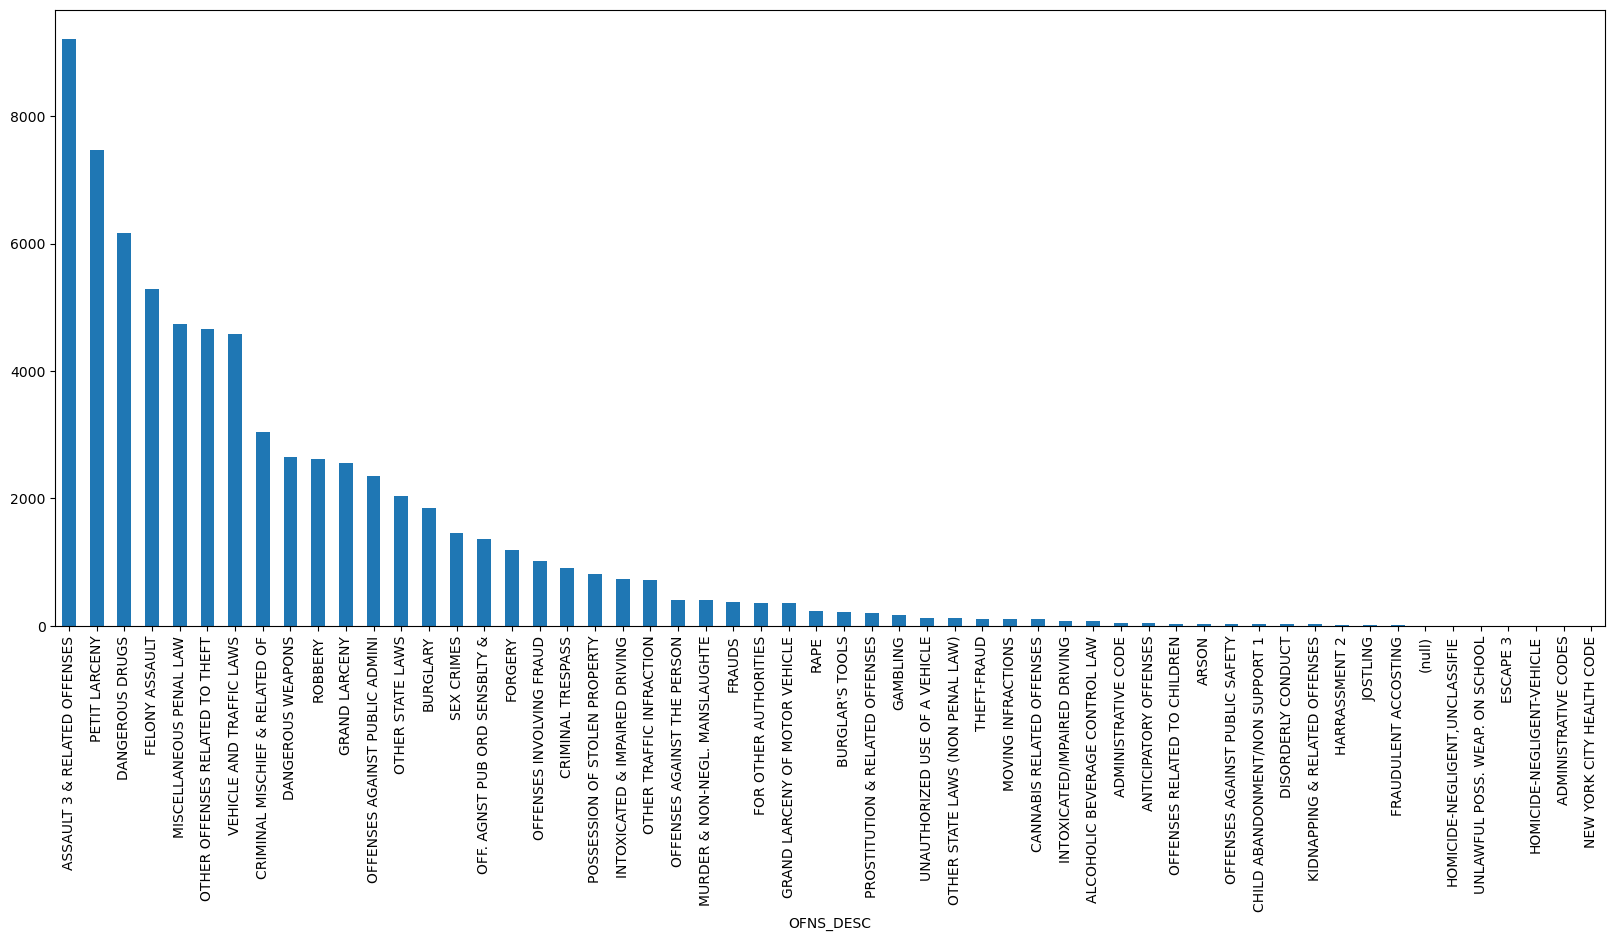

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

df['OFNS_DESC'].value_counts().plot.bar()

Assult shows up two times within the top two most frequent offenses.

<Axes: xlabel='PERP_SEX'>

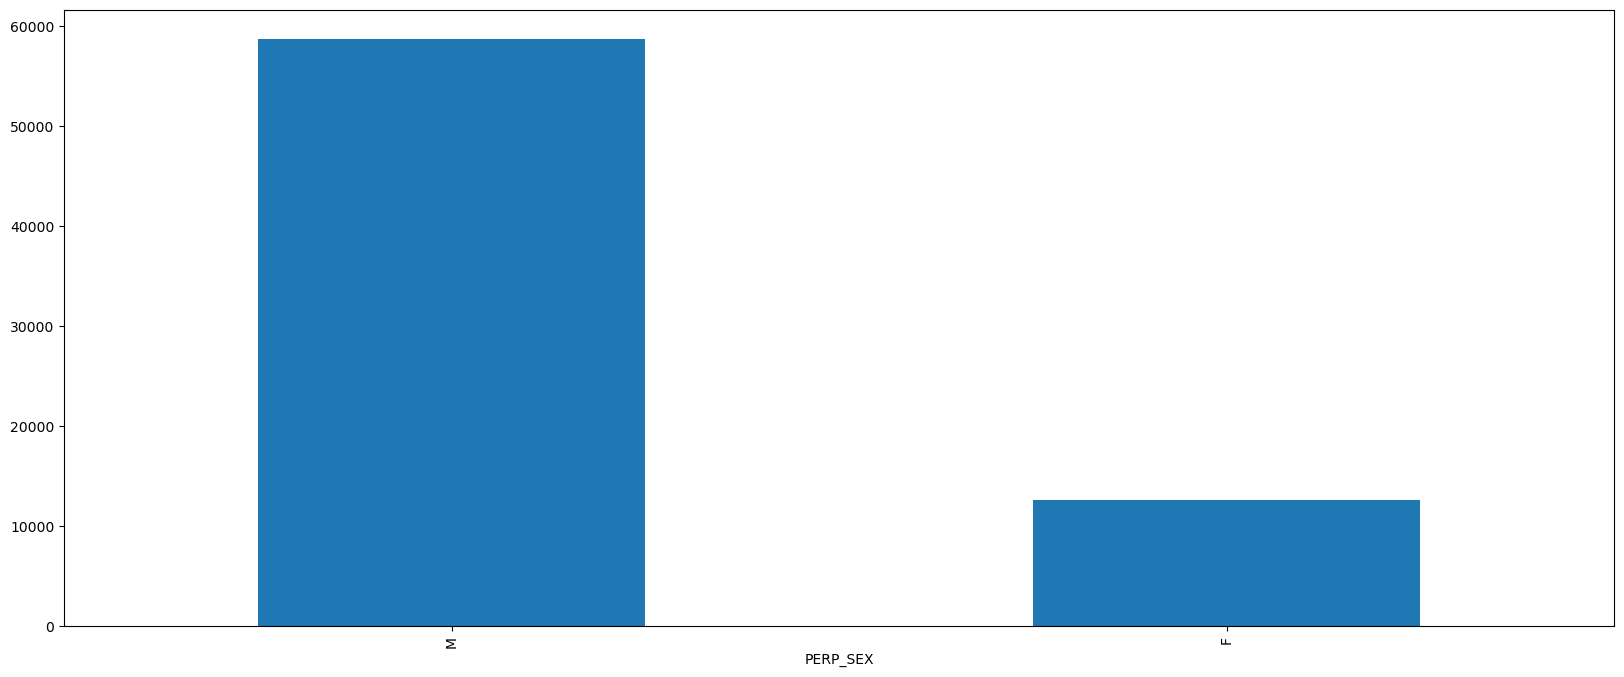

In [6]:
plt.figure(figsize=(20,8))
df['PERP_SEX'].value_counts().plot.bar()

Males make up most of the crimes based on the current data.

<Axes: xlabel='PERP_RACE'>

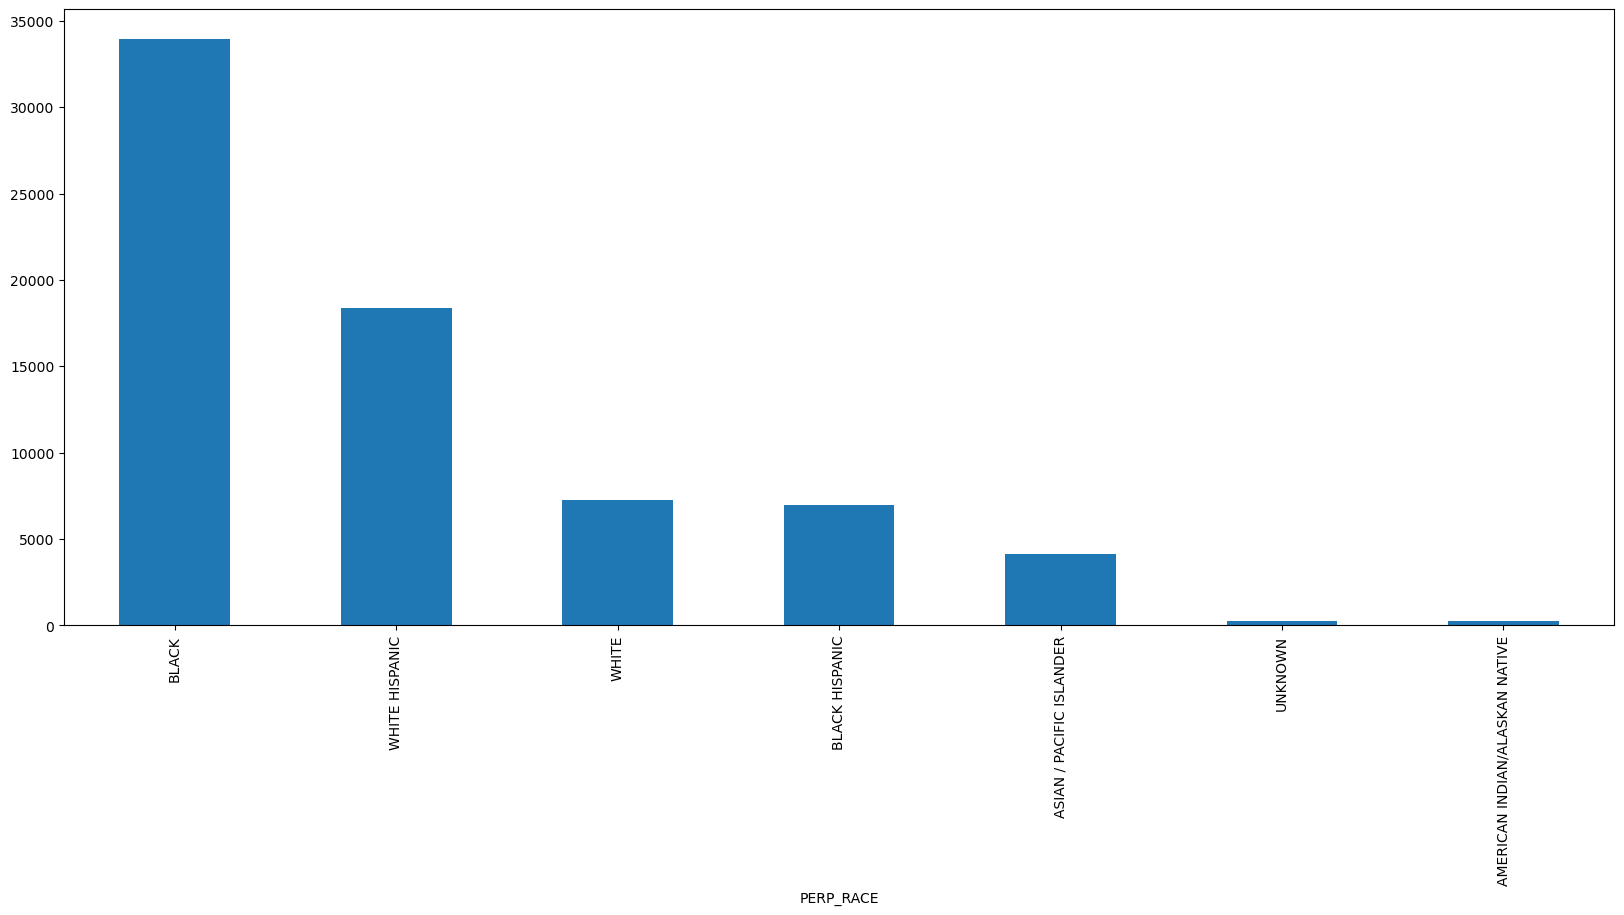

In [7]:
plt.figure(figsize=(20,8))
df['PERP_RACE'].value_counts().plot.bar()

<Axes: xlabel='LAW_CAT_CD'>

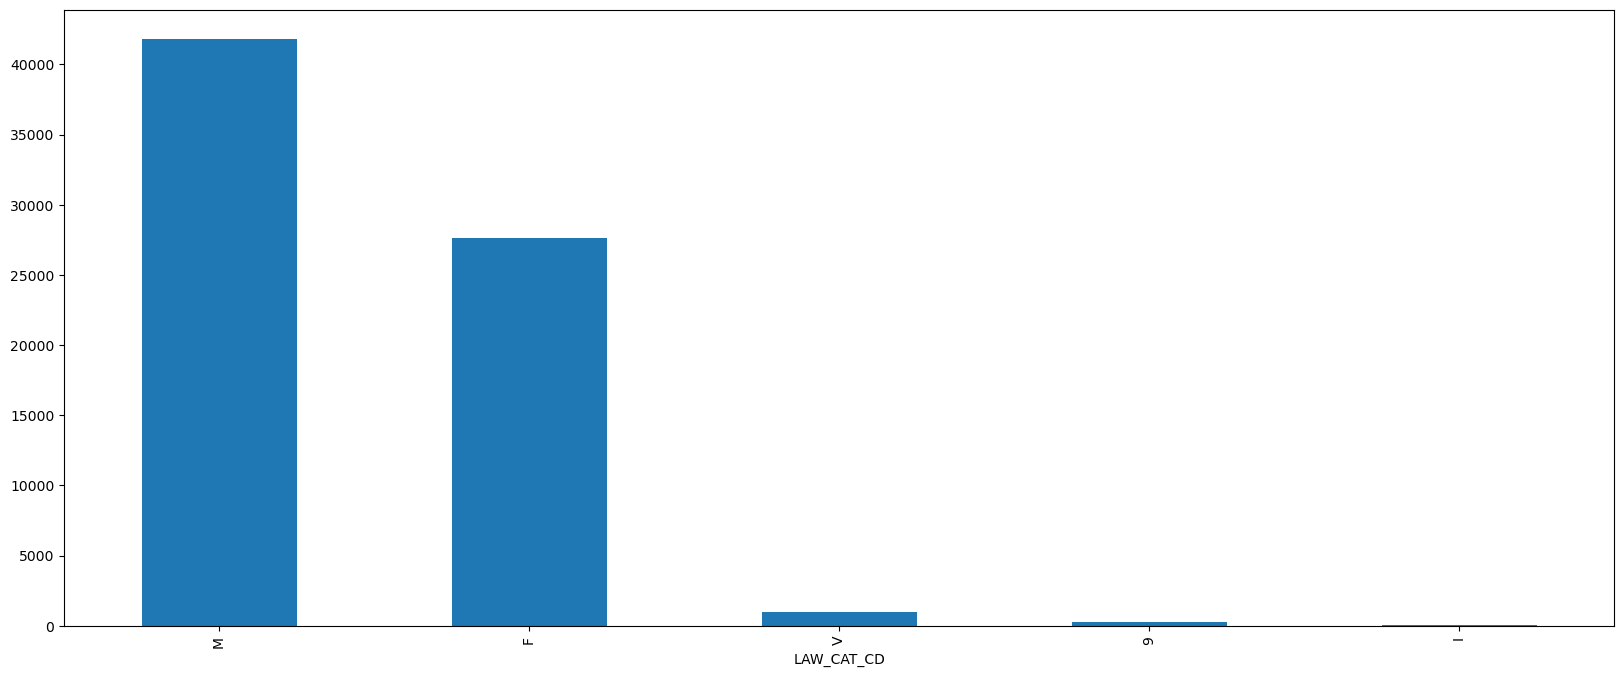

In [28]:
plt.figure(figsize=(20,8))
df['LAW_CAT_CD'].value_counts().plot.bar()

Most crimes right now seem to be misdeamenors

<Axes: xlabel='ARREST_BORO'>

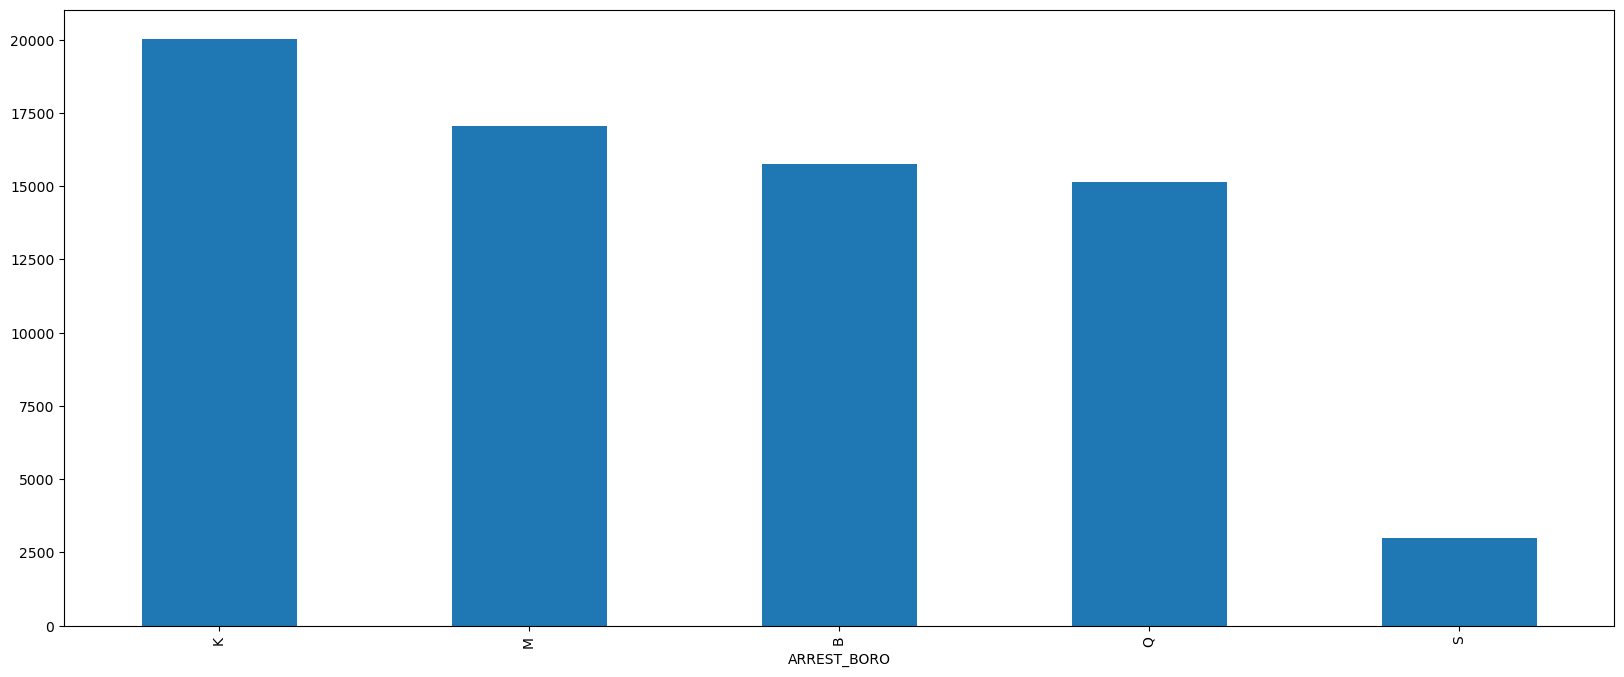

In [29]:
plt.figure(figsize=(20,8))
df['ARREST_BORO'].value_counts().plot.bar()

<Axes: >

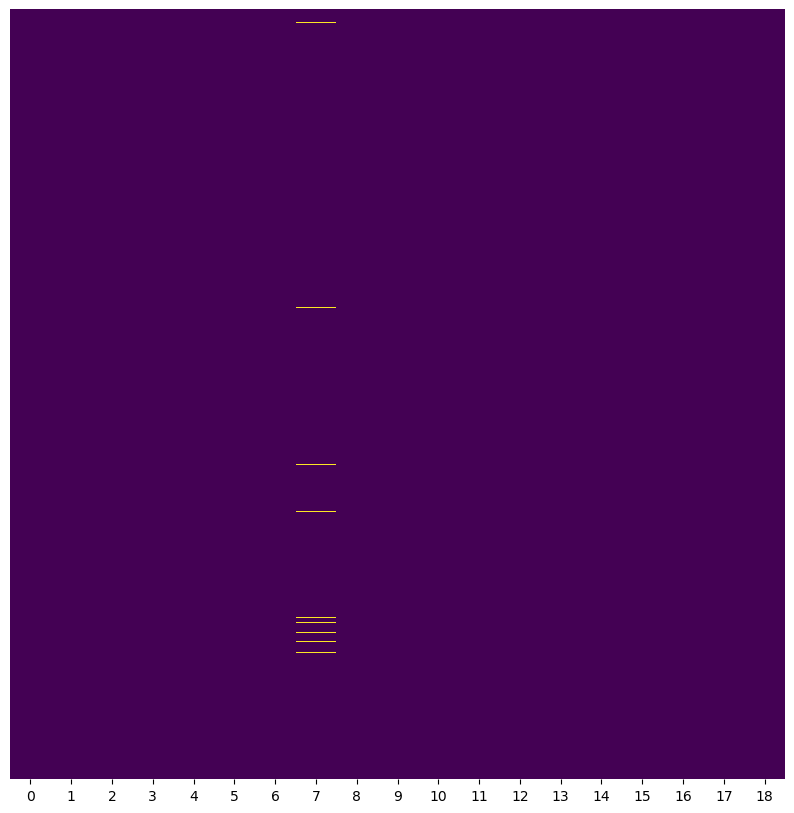

In [8]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

There do not seem to be much nulls besides in the law cat code aka level of offense.

In [9]:
df[df['Latitude'] == 0]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.0,0.0,POINT (0 0)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.0,0.0,POINT (0 0)
5,299355928,01/13/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
15,300779462,02/08/2025,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,M,18,0,45-64,M,WHITE,0,0,0.0,0.0,POINT (0 0)
19,301248086,02/18/2025,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,45,2,18-24,M,BLACK,0,0,0.0,0.0,POINT (0 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71103,303843167,03/29/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113,FORGERY,PL 1657200,F,M,5,0,25-44,M,BLACK,0,0,0.0,0.0,POINT (0 0)
71128,303917814,03/31/2025,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL 1402000,F,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
71178,303867059,03/30/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,K,83,0,18-24,F,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
71197,303921475,03/31/2025,639,AGGRAVATED HARASSMENT 2,361,OFF. AGNST PUB ORD SENSBLTY &,PL 240301A,M,M,9,2,45-64,M,BLACK HISPANIC,0,0,0.0,0.0,POINT (0 0)


In [10]:
df[df['Longitude'] == 0]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.0,0.0,POINT (0 0)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.0,0.0,POINT (0 0)
5,299355928,01/13/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
15,300779462,02/08/2025,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,M,18,0,45-64,M,WHITE,0,0,0.0,0.0,POINT (0 0)
19,301248086,02/18/2025,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,45,2,18-24,M,BLACK,0,0,0.0,0.0,POINT (0 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71103,303843167,03/29/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113,FORGERY,PL 1657200,F,M,5,0,25-44,M,BLACK,0,0,0.0,0.0,POINT (0 0)
71128,303917814,03/31/2025,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL 1402000,F,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
71178,303867059,03/30/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,K,83,0,18-24,F,WHITE HISPANIC,0,0,0.0,0.0,POINT (0 0)
71197,303921475,03/31/2025,639,AGGRAVATED HARASSMENT 2,361,OFF. AGNST PUB ORD SENSBLTY &,PL 240301A,M,M,9,2,45-64,M,BLACK HISPANIC,0,0,0.0,0.0,POINT (0 0)


Seems there are 214 rows where the location is none, considering we will still have 99.699615395 of our data if we drop the rows, its safe to say we can

In [36]:
df[df['LAW_CAT_CD'].isna()]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
128,299849887,2025-01-22,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,M,33,...,BLACK HISPANIC,1001056,247633,40.846364,-73.939258,POINT (-73.939258 40.846364),25,44,Wednesday,January
184,300731627,2025-02-07,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,M,5,...,BLACK,982682,199754,40.714965,-74.005655,POINT (-74.005655 40.714965),25,44,Friday,February
580,299433514,2025-01-14,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,B,47,...,WHITE HISPANIC,1021057,259407,40.878619,-73.866900,POINT (-73.8669 40.878619),45,64,Tuesday,January
975,299603473,2025-01-16,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,Q,110,...,BLACK HISPANIC,1018014,209315,40.741143,-73.878157,POINT (-73.878157 40.741143),18,24,Thursday,January
1060,300151635,2025-01-28,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,B,44,...,WHITE HISPANIC,1005142,246042,40.841989,-73.924494,POINT (-73.924494 40.841989),25,44,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69160,301857979,2025-02-28,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,M,1,...,WHITE HISPANIC,982531,204757,40.728697,-74.006203,POINT (-74.006203 40.728697),25,44,Friday,February
69336,302189749,2025-03-06,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,M,10,...,BLACK,982303,210250,40.743774,-74.007025,POINT (-74.007025 40.743774),25,44,Thursday,March
69448,303065286,2025-03-18,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,B,40,...,BLACK,1006063,238341,40.820848,-73.921188,POINT (-73.921188 40.820848),25,44,Tuesday,March
70739,303885903,2025-03-30,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,None,M,5,...,ASIAN / PACIFIC ISLANDER,982682,199754,40.714965,-74.005655,POINT (-74.005655 40.714965),25,44,Sunday,March


In [11]:
df = df[~((df['Longitude'] == 0) |(df['Latitude'] == 0))]
df.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 71028 entries, 1 to 71241
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71028 non-null  int64  
 1   ARREST_DATE               71028 non-null  object 
 2   PD_CD                     71028 non-null  int64  
 3   PD_DESC                   71028 non-null  object 
 4   KY_CD                     71024 non-null  float64
 5   OFNS_DESC                 71028 non-null  object 
 6   LAW_CODE                  71028 non-null  object 
 7   LAW_CAT_CD                70668 non-null  object 
 8   ARREST_BORO               71028 non-null  object 
 9   ARREST_PRECINCT           71028 non-null  int64  
 10  JURISDICTION_CODE         71028 non-null  int64  
 11  AGE_GROUP                 71028 non-null  object 
 12  PERP_SEX                  71028 non-null  object 
 13  PERP_RACE                 71028 non-null  object 
 14  X_COOR

Seems based on each columns value counts now no column has missing data, this is great as it means we can get to work, but one thing I noticed was the age column, we would have to fix that to make use of the ages as numerical values.

**AGE_GROUP** -----------

**AGE_GROUP**

**25-44**    41830

**45-64**    15070

**18-24**    10549

**<18**       2446

**65+**       1347

**Name**: count, **dtype**: int64

In [12]:
# Function to extract minimum age
def get_min_age(age_group):
    if '-' in age_group:
        # splits based on if and returns appropriate value
        return int(age_group.split('-')[0])
    elif '<' in age_group:
        # splits based on if and returns appropriate value
        return 0
    elif '+' in age_group:
        # splits based on if and returns appropriate value
        return int(age_group.split('+')[0])
    return None

# Function to extract maximum age
def get_max_age(age_group):
    if '-' in age_group:
        # splits based on if and returns appropriate value
        return int(age_group.split('-')[1])
    elif '<' in age_group:
        # splits based on if and returns appropriate value
        return 17
    elif '+' in age_group:
        # splits based on if and returns appropriate value
        return 99
    return None

# Apply the functions to create the new columns
df['MIN_AGE'] = df['AGE_GROUP'].apply(get_min_age)
df['MAX_AGE'] = df['AGE_GROUP'].apply(get_max_age)

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE
1,298799078,01/02/2025,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,...,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44
3,299008265,01/07/2025,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,...,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,...,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44
6,299436365,01/14/2025,157,RAPE 1,104,RAPE,PL 130352B,F,Q,112,...,45-64,M,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64
7,299562518,01/16/2025,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601504,F,M,26,...,<18,M,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17


In [13]:
# printing df.info() a second time for reminding
df.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 71028 entries, 1 to 71241
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71028 non-null  int64  
 1   ARREST_DATE               71028 non-null  object 
 2   PD_CD                     71028 non-null  int64  
 3   PD_DESC                   71028 non-null  object 
 4   KY_CD                     71024 non-null  float64
 5   OFNS_DESC                 71028 non-null  object 
 6   LAW_CODE                  71028 non-null  object 
 7   LAW_CAT_CD                70668 non-null  object 
 8   ARREST_BORO               71028 non-null  object 
 9   ARREST_PRECINCT           71028 non-null  int64  
 10  JURISDICTION_CODE         71028 non-null  int64  
 11  AGE_GROUP                 71028 non-null  object 
 12  PERP_SEX                  71028 non-null  object 
 13  PERP_RACE                 71028 non-null  object 
 14  X_COOR

<Axes: xlabel='MIN_AGE'>

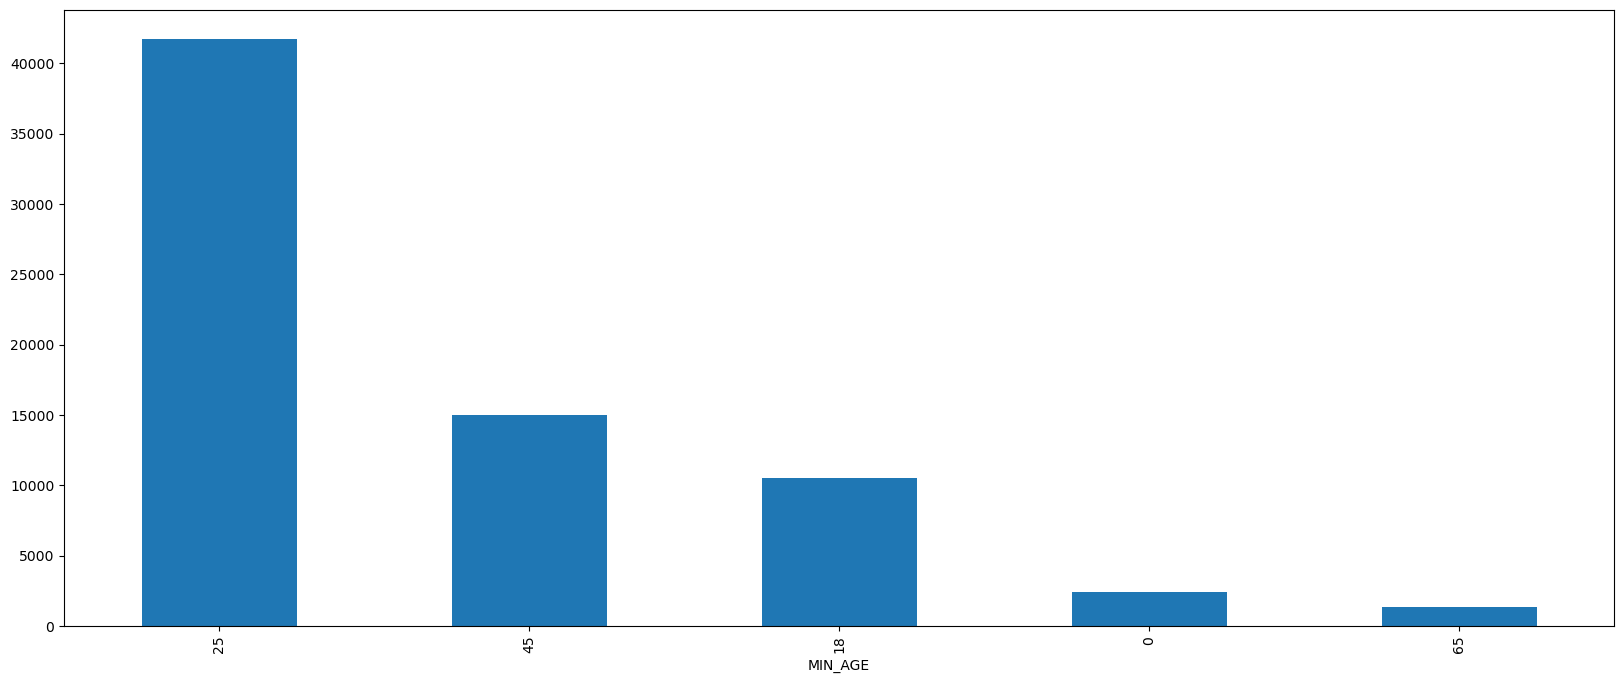

In [32]:
plt.figure(figsize=(20,8))
df['MIN_AGE'].value_counts().plot.bar()

<Axes: xlabel='MAX_AGE'>

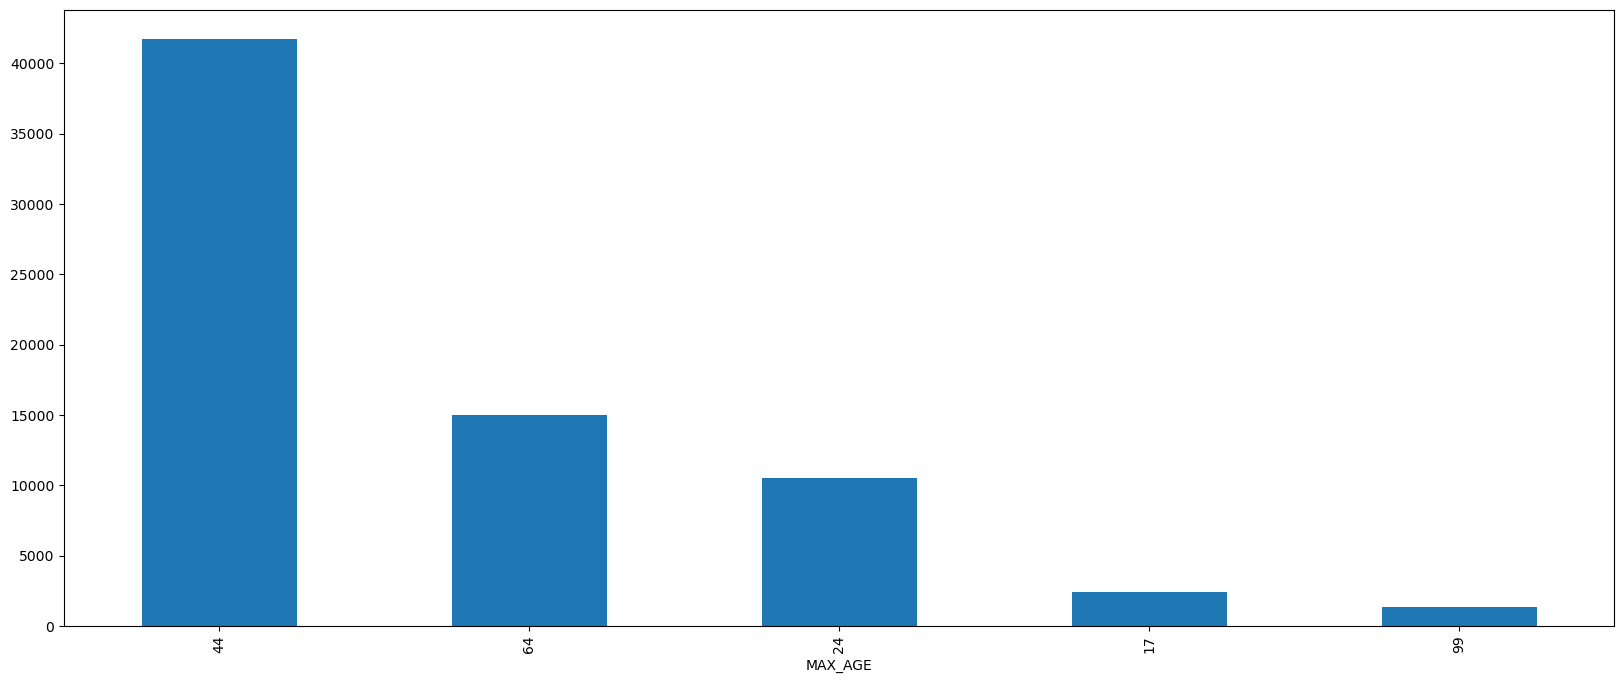

In [33]:
plt.figure(figsize=(20,8))
df['MAX_AGE'].value_counts().plot.bar()

People 25 to 44 make up most of the crime it seems


In [14]:
# Convert the 'ARREST_DATE' column to datetime objects
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y')

# Extract the day of the week name
df['DAY_OF_WEEK'] = df['ARREST_DATE'].dt.day_name()

# Extract the month
df['MONTH'] = df['ARREST_DATE'].dt.month_name()

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
1,298799078,2025-01-02,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
3,299008265,2025-01-07,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
4,298969999,2025-01-06,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
6,299436365,2025-01-14,157,RAPE 1,104,RAPE,PL 130352B,F,Q,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
7,299562518,2025-01-16,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601504,F,M,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


In [15]:
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns

print(numeric_cols)

Index(['ARREST_KEY', 'PD_CD', 'KY_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'MIN_AGE',
       'MAX_AGE'],
      dtype='object')


In [16]:
df[numeric_cols].head()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,MIN_AGE,MAX_AGE
1,298799078,101,344,23,0,1000213,228833,40.794755,-73.942348,25,44
3,299008265,105,106,113,0,1046399,187126,40.680086,-73.775931,45,64
4,298969999,793,118,5,73,983907,199958,40.715526,-74.001238,25,44
6,299436365,157,104,112,0,1025401,202586,40.722641,-73.851542,45,64
7,299562518,397,105,26,0,996342,236149,40.814853,-73.956314,0,17


# Numeric Column Metadata

| Column Name       | Description                                                                                                                               | API Field Name    | Data Type        |
|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------|-------------------|------------------|
| ARREST_KEY        | Randomly generated persistent ID for each arrest                                                                                          | arrest_key        | Text             |
| PD_CD             | Three digit internal classification code (more granular than Key Code)                                                                      | pd_cd             | Number           |
| KY_CD             | Three digit internal classification code (more general category than PD code)                                                             | ky_cd             | Number           |
| ARREST_PRECINCT   | Precinct where the arrest occurred                                                                                                        | arrest_precinct   | Number           |
| JURISDICTION_CODE | Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions | jurisdiction_code | Number           |
| X_COORD_CD        | Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)                        | x_coord_cd        | Number           |
| Y_COORD_CD        | Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)                        | y_coord_cd        | Number           |
| Latitude          | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)                                                     | latitude          | Number           |
| Longitude         | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)                                                    | longitude         | Number           |

Based on the metadata it seems we do not need arrest key, x coord and y coord are either useless or redundant, and besdies that we should year since this data is from this year to right now

In [17]:
useful_numerics = ['PD_CD', 'KY_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'Latitude', 'Longitude', 'MIN_AGE', 'MAX_AGE']
df[useful_numerics].head(10)

,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MIN_AGE,MAX_AGE
1,101,344,23,0,40.794755,-73.942348,25,44
3,105,106,113,0,40.680086,-73.775931,45,64
4,793,118,5,73,40.715526,-74.001238,25,44
6,157,104,112,0,40.722641,-73.851542,45,64
7,397,105,26,0,40.814853,-73.956314,0,17
8,105,106,113,0,40.680086,-73.775931,18,24
9,109,106,101,0,40.589791,-73.788678,45,64
10,397,105,81,0,40.679670,-73.936136,25,44
11,157,104,77,0,40.674496,-73.930571,18,24
12,105,106,103,0,40.707447,-73.792141,25,44


In [18]:
# casting max age cause its a float idk why
df['MAX_AGE'] = df['MAX_AGE'].astype(int)

In [19]:
df[useful_numerics].head(10)

,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MIN_AGE,MAX_AGE
1,101,344,23,0,40.794755,-73.942348,25,44
3,105,106,113,0,40.680086,-73.775931,45,64
4,793,118,5,73,40.715526,-74.001238,25,44
6,157,104,112,0,40.722641,-73.851542,45,64
7,397,105,26,0,40.814853,-73.956314,0,17
8,105,106,113,0,40.680086,-73.775931,18,24
9,109,106,101,0,40.589791,-73.788678,45,64
10,397,105,81,0,40.679670,-73.936136,25,44
11,157,104,77,0,40.674496,-73.930571,18,24
12,105,106,103,0,40.707447,-73.792141,25,44


In [20]:
for c in df[useful_numerics].columns:
    print("Printing Mean, Median, Maximum, Minimum, for column: ", c)
    print("Mean: ", df[c].mean().round(2))
    print("Median: ", df[c].median())
    print("Maximum: ", df[c].max())
    print("Minimum: ", df[c].min())
    print("----------------------------------",'\n\n')

Printing Mean, Median, Maximum, Minimum, for column:  PD_CD
Mean:  457.65
Median:  439.0
Maximum:  969
Minimum:  12
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  KY_CD
Mean:  262.01
Median:  341.0
Maximum:  995
Minimum:  101
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  ARREST_PRECINCT
Mean:  63.3
Median:  62.0
Maximum:  123
Minimum:  1
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  JURISDICTION_CODE
Mean:  0.87
Median:  0.0
Maximum:  97
Minimum:  0
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  Latitude
Mean:  40.74
Median:  40.733735
Maximum:  40.911307
Minimum:  40.50039
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  Longitude
Mean:  -73.92
Median:  -73.925119
Maximum:  -73.700719
Minimum:  -74.252488
---------------------------------- 


Printing Mean, Median

['PD_CD', 'KY_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'Latitude', 'Longitude', 'MIN_AGE', 'MAX_AGE'] 




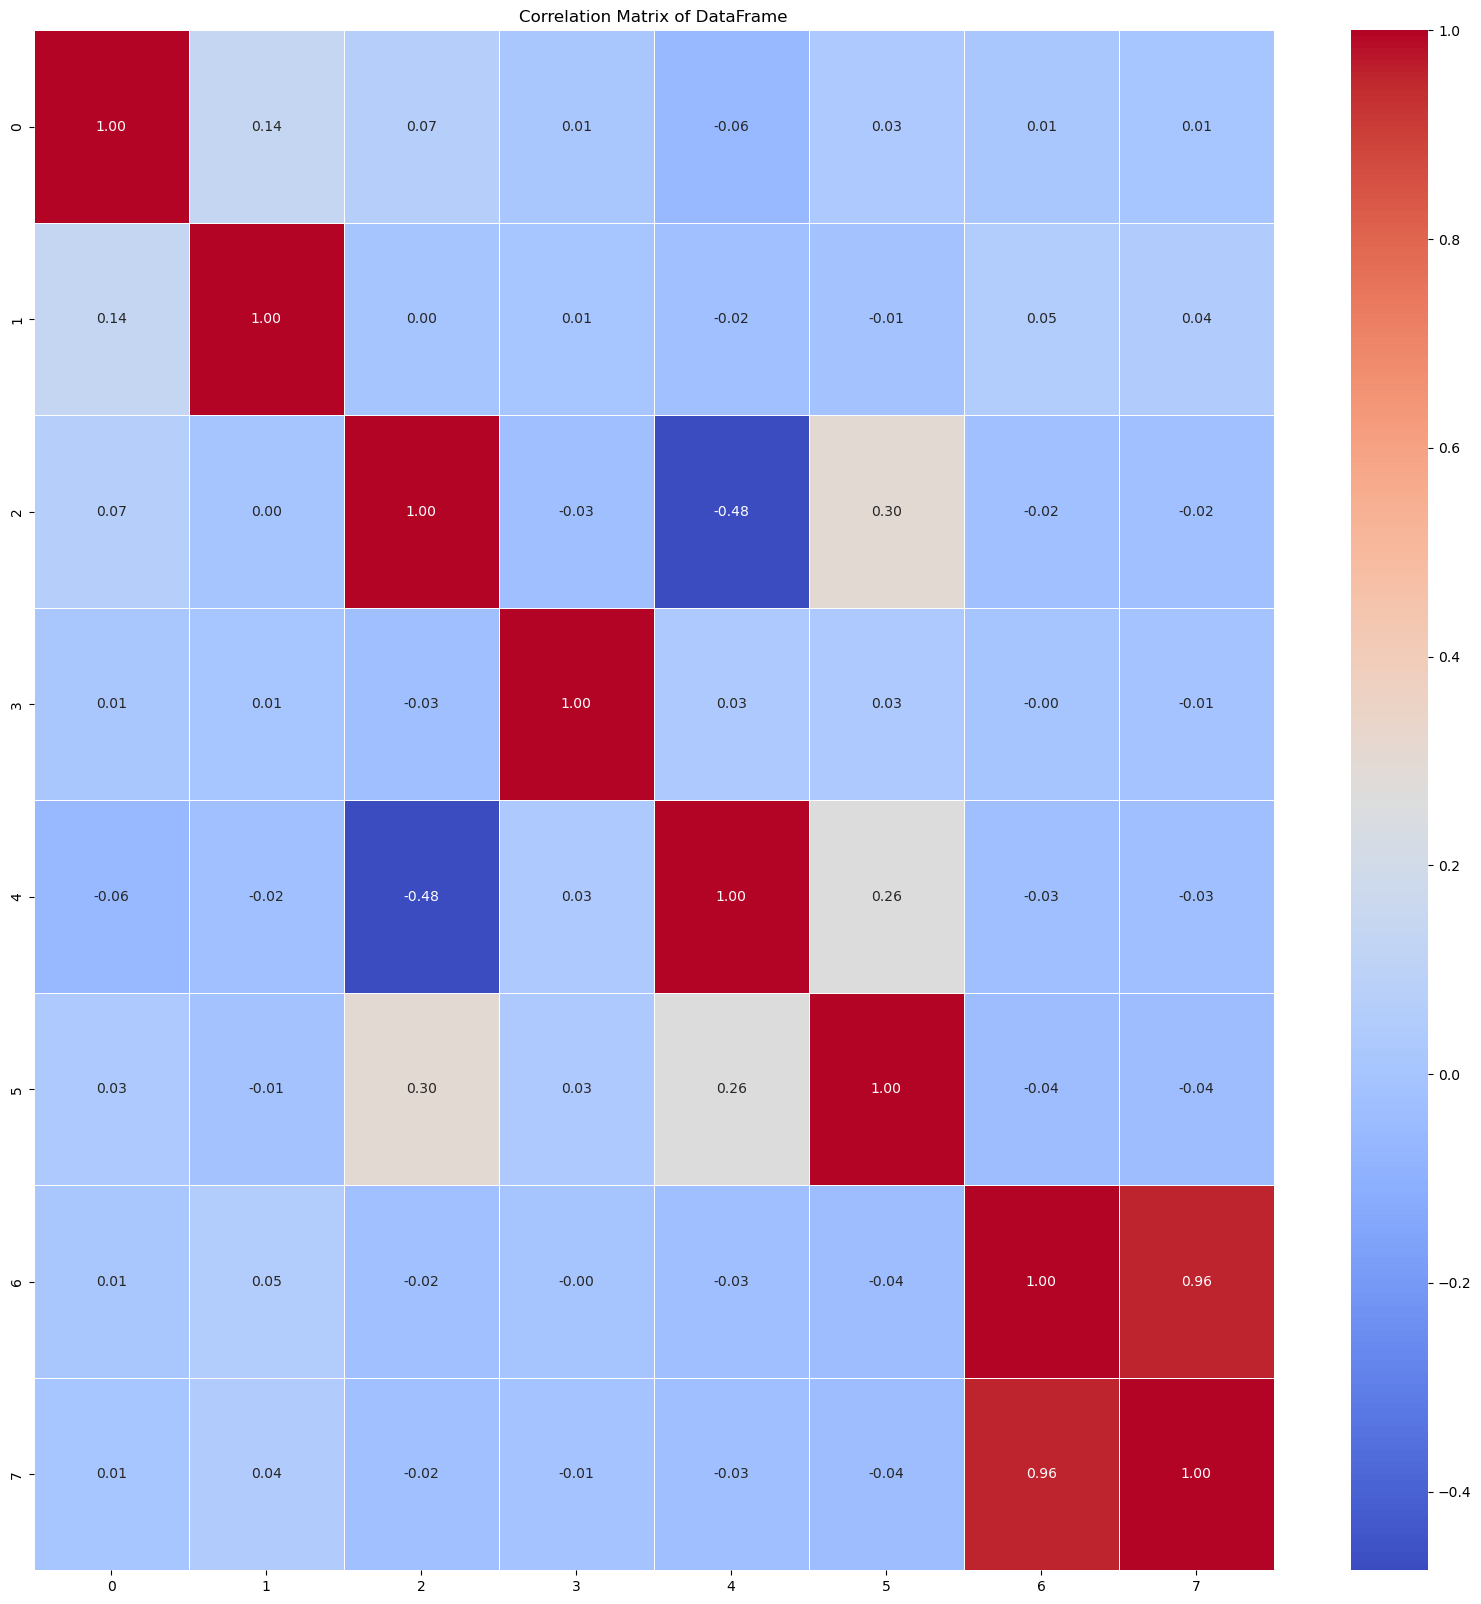

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(useful_numerics, '\n\n')

plt.figure(figsize=(20,20))
correlation_matrix = df[useful_numerics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of DataFrame')
plt.show()

Besides the long and lat having a correlation, it seems ARREST_PRECINCT has an okay correlation with both, this could point to a strong coorelation with the location as a whole.

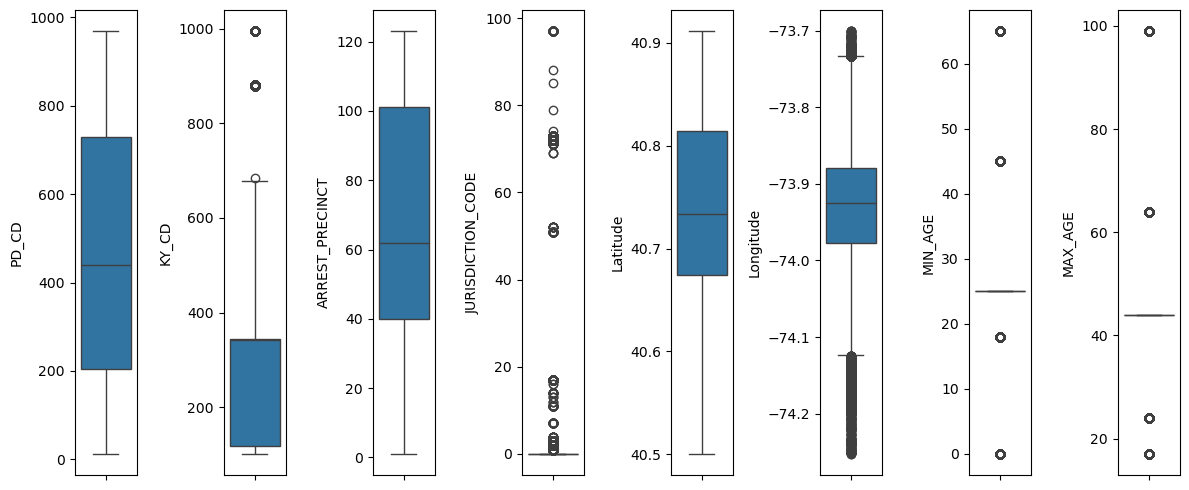

In [ ]:
num_columns = len(useful_numerics)

plt.figure(figsize=(12, 5))
for i in range(num_columns):
  plt.subplot(1, num_columns, i+1)
  sns.boxplot(y = df[useful_numerics[i]])
  plt.tight_layout()

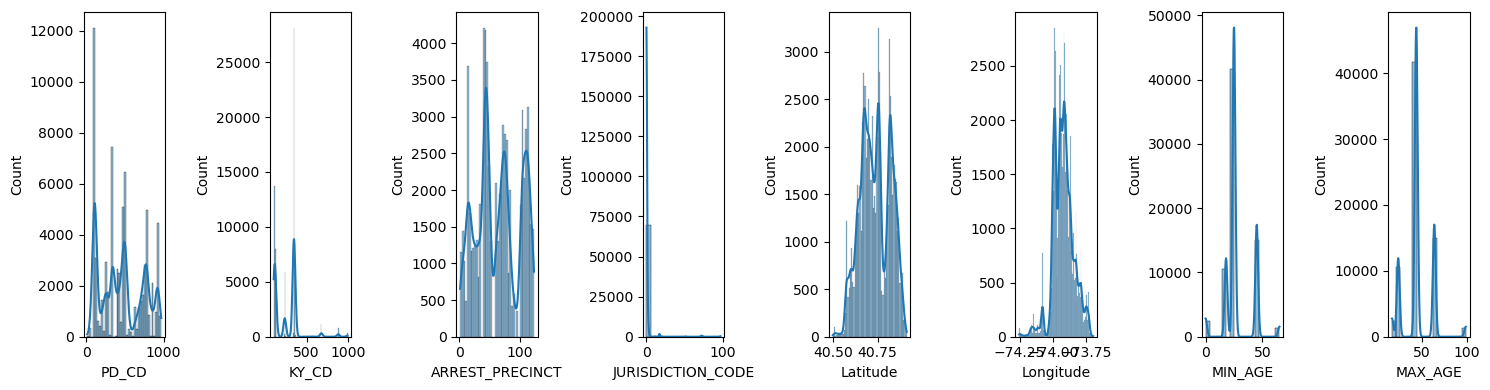

In [ ]:
plt.figure(figsize=(15,4))

for i in range(num_columns):
  data = df[useful_numerics[i]]
  plt.subplot(1, num_columns,i+1)
  sns.histplot(data, kde=True)
  plt.tight_layout()

In [23]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'MIN_AGE', 'MAX_AGE', 'DAY_OF_WEEK', 'MONTH'],
      dtype='object')

To make use of the data later lets save the data as the better version wihtout the useless columns

In [24]:
columns_to_drop = ['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column']
df_dropped = df.drop(columns=columns_to_drop)
print('\n\n\n',df_dropped.info())

df_dropped.head()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 71028 entries, 1 to 71241
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ARREST_DATE        71028 non-null  datetime64[ns]
 1   PD_CD              71028 non-null  int64         
 2   PD_DESC            71028 non-null  object        
 3   KY_CD              71024 non-null  float64       
 4   OFNS_DESC          71028 non-null  object        
 5   LAW_CODE           71028 non-null  object        
 6   LAW_CAT_CD         70668 non-null  object        
 7   ARREST_BORO        71028 non-null  object        
 8   ARREST_PRECINCT    71028 non-null  int64         
 9   JURISDICTION_CODE  71028 non-null  int64         
 10  AGE_GROUP          71028 non-null  object        
 11  PERP_SEX           71028 non-null  object        
 12  PERP_RACE          71028 non-null  object        
 13  Latitude           71028 non-null  float64       
 14  Longit

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
1,2025-01-02,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,40.794755,-73.942348,25,44,Thursday,January
3,2025-01-07,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,40.680086,-73.775931,45,64,Tuesday,January
4,2025-01-06,793,WEAPONS POSSESSION 3,118,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,40.715526,-74.001238,25,44,Monday,January
6,2025-01-14,157,RAPE 1,104,RAPE,PL 130352B,F,Q,112,0,45-64,M,BLACK,40.722641,-73.851542,45,64,Tuesday,January
7,2025-01-16,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601504,F,M,26,0,<18,M,BLACK,40.814853,-73.956314,0,17,Thursday,January


Great, we have some good data, lets save it!

In [25]:
df.to_csv("../datasets/processed/arrests2025_cleaned.csv", index=False)